In [1]:
from adam import ADAM
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap
import numpy as np
from qiskit.quantum_info import Statevector
from math import log

In [2]:
# size of training data set
training_size = 100
# dimension of data sets
n = 2
from sklearn import datasets
from sklearn import preprocessing
iris = datasets.load_iris()
# load iris and normalise
x = preprocessing.normalize(iris.data)
x1_train = x[0:49, :] # class A
x2_train = x[50:99, :] # class B
training_input = {'A':x1_train, 'B':x2_train}
class_labels = ['A', 'B']

In [3]:
sv = Statevector.from_label('0' * n)

In [4]:
def final_circuit(circuit, data, params):
    for i in range(n):
        circuit.h(i)
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i], i)
    circuit.cx(0,1)
    for i in range(n):
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i+2], i)
    for i in range(n):
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i+4], i)
    for i in range(n):
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i+6], i)
    for i in range(n):
        circuit.rz(data[i],i)
        circuit.ry(data[i+2],i)
        circuit.ry(params[i+8], i)

In [5]:
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        return class_labels[1]
    else:
        return class_labels[0]

def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
              class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circuit = QuantumCircuit(n)
        circ_ = final_circuit(circuit, x, params)
        qc = sv.evolve(circuit)
        qc_list += [qc]
    probs = []
    for qc in qc_list:
        counts = qc.probabilities_dict()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs


def CrossEntropy(yHat, y):
    if y == 'A':
      return -log(yHat['A'])
    else:
      return -log(1-yHat['A'])


def cost_function(training_input, class_labels, params, shots=100, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for label, samples in training_input.items():
        for sample in samples:
            training_labels += [label]
            training_samples += [sample]

    # classify all samples
    probs = classify(training_samples, params, class_labels)

    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        # cost += cost_estimate_sigmoid(prob, training_labels[i])
        cost += CrossEntropy(yHat=prob, y=training_labels[i])
    cost /= len(training_samples)

    # return objective value
    #print(cost)
    return cost


# setup the optimizer
optimizer = ADAM(maxiter=100, lr=0.1)

# define objective function for training
objective_function = lambda params: cost_function(training_input, class_labels, params, print_value=True)

d = 10  # num of trainable params
for i in range(88,100,1):
    np.random.seed(i)
    # randomly initialize the parameters
    init_params = np.random.uniform(-1,1,10)
    print(init_params)
    # train classifier
    init_params = np.random.uniform(-1,1,10)
    opt_params, value, _, loss = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
    print(loss)
    print(opt_params)
    # print results
    f1 = 'quantum_loss_easy_layer5_%d.npy' %i
    f2 = 'opt_params_easy_layer5_%d.npy'%i
    np.save(f2, opt_params)
    np.save(f1, loss)

hello
[ 0.2951021   0.01429938  0.05668276  0.79257041  0.39998238  0.4285942
  0.43467676 -0.55436108 -0.64969095 -0.08631702]
[0.4791516246470907, 0.44227606487108206, 0.414916481304589, 0.38963525945871597, 0.36583363440023026, 0.34377895375071393, 0.3208949913782627, 0.29533203233448196, 0.2674669820015083, 0.23953042855191642, 0.21427219090315583, 0.19372275279093418, 0.17874582194217664, 0.16889641097912944, 0.16273349093651202, 0.15879660804397816, 0.1561770300770763, 0.15423909665982674, 0.15229698206614647, 0.14968307676757553, 0.14596311222951372, 0.1410303766525163, 0.13509317702438142, 0.12863419969563025, 0.12229168127661869, 0.11663348681678756, 0.11197156049368376, 0.10835268991204795, 0.10561457742363953, 0.10343751695263208, 0.1015065141793844, 0.09967926899071214, 0.09799399085440802, 0.09661075581586957, 0.095737889450882, 0.0954706868536355, 0.09563134920708627, 0.09579209555793766, 0.09549570924867189, 0.09451935292082635, 0.09300195482093353, 0.09134432480553983, 

[0.6036333426530636, 0.5266410173030935, 0.4923106892483989, 0.46125753801484326, 0.42193487566779597, 0.37873444440730664, 0.33654070026432753, 0.299787858884011, 0.2752207440631466, 0.2687121085240934, 0.27744183457078436, 0.28726470973381385, 0.28506110691650355, 0.2711388783911916, 0.2558946269928342, 0.2484069532211032, 0.2475743628309505, 0.24416276340939308, 0.23272812583123442, 0.21695188217595165, 0.20465596954315252, 0.2001800388444356, 0.2006307337222349, 0.1999349752440897, 0.19600246389631346, 0.1917204407015278, 0.1902266406185172, 0.19127298127878534, 0.19207738419364034, 0.19069260262237125, 0.18777117043638022, 0.18536502095716745, 0.18463712678577315, 0.18483458840168948, 0.18439151770355247, 0.18275952780731902, 0.18081999083586645, 0.1796412842603926, 0.17922242576893965, 0.1786095858346172, 0.17710279595907205, 0.17507236534240073, 0.17345830854757907, 0.17261123370358222, 0.1719304335668441, 0.1707701223387768, 0.16934707953949568, 0.16837405398690947, 0.168022499

[0.813801433977916, 0.5850926114822025, 0.4544565349622748, 0.4162191407927177, 0.43602150434909104, 0.4736155464255532, 0.5016089021579311, 0.5100819518152933, 0.5003042010894762, 0.4779130850278662, 0.44916017978339756, 0.41937115486794635, 0.3927141940559821, 0.37253675827317234, 0.36126764547494655, 0.35940210796510025, 0.3643467548683673, 0.3706008338705133, 0.3719527079917192, 0.36452947312595935, 0.3485827004831404, 0.3279668978616739, 0.30796510830181734, 0.29285503066191504, 0.28433939162848904, 0.28130123619742775, 0.28072218783773384, 0.27919570868964805, 0.27434200929037433, 0.26562998489903455, 0.25445463574260263, 0.24350355029444387, 0.2355158695222501, 0.23181974272191683, 0.23148118179336288, 0.23187015043655257, 0.23049692163753835, 0.2267715954104986, 0.22225315044799485, 0.21923162719814526, 0.21885062651135928, 0.22026699942260694, 0.22143570693082995, 0.22074657355744717, 0.21812639063484965, 0.21485077935673308, 0.21237787428664226, 0.21115803578602696, 0.2103609

In [7]:
loss_eqnn_d1 = np.load('quantum_loss_easy_layer5_99.npy')

In [8]:
loss_eqnn_d1.shape

(100,)

In [9]:
loss = np.zeros((100,100))
for i in range(100):
    file = 'quantum_loss_easy_layer5_%d.npy'%i
    loss[i] += np.load(file, allow_pickle=True)

In [10]:
loss.shape

(100, 100)

Text(0.5, 1.0, 'Training 5 Layers (Data Reuploading, Qubits = 2, Easy Model)')

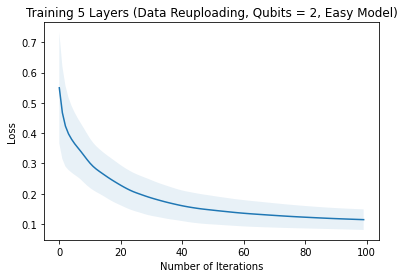

In [12]:
import matplotlib.pyplot as plt

stddevs =[]
averages =[]
sd = np.std(loss, axis=0)
av = np.average(loss, axis=0)
plt.plot(range(100), av)
plt.fill_between(range(100), av+np.array(sd), av-np.array(sd), alpha=0.1)
stddevs.append(sd)
averages.append(av)

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training 5 Layers (Data Reuploading, Qubits = 2, Easy Model)")